# Data Loading

In [1]:
import pandas as pd

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
file_path1 = 'C:/Users/user_name/Downloads/sales (2).csv'

In [4]:
sales_df = pd.read_csv(file_path1)

In [5]:
sales_df = pd.read_csv(file_path1)

In [6]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [7]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS_,QTR_ID,MONTH_ID,YEAR_ID,DEALSIZE,CUSTOMERNAME,PRODUCTCODE,PRODUCTLINE,MSRP,Unique_ID
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Small,Land of Toys Inc.,S10_1678,Motorcycles,95,1
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Small,Reims Collectables,S10_1678,Motorcycles,95,2
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Medium,Lyon Souveniers,S10_1678,Motorcycles,95,3
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Medium,Toys4GrownUps.com,S10_1678,Motorcycles,95,4
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Medium,Corporate Gift Ideas Co.,S10_1678,Motorcycles,95,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Small,Euro Shopping Channel,S72_3212,Ships,54,2819
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Medium,"Oulu Toy Supplies, Inc.",S72_3212,Ships,54,2820
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Medium,Euro Shopping Channel,S72_3212,Ships,54,2821
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Small,Alpha Cognac,S72_3212,Ships,54,2822


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS_          2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  DEALSIZE         2823 non-null   object 
 11  CUSTOMERNAME     2823 non-null   object 
 12  PRODUCTCODE      2823 non-null   object 
 13  PRODUCTLINE      2823 non-null   object 
 14  MSRP             2823 non-null   int64  
 15  Unique_ID        2823 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 353.0+ KB


In [10]:
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [11]:
sales_df = sales_df.rename(columns={'QUANTITYORDERED':'QUANTITY_SOLD'})
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITY_SOLD    2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS_          2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   MONTH_ID         2823 non-null   int64         
 9   YEAR_ID          2823 non-null   int64         
 10  DEALSIZE         2823 non-null   object        
 11  CUSTOMERNAME     2823 non-null   object        
 12  PRODUCTCODE      2823 non-null   object        
 13  PRODUCTLINE      2823 non-null   object        
 14  MSRP             2823 non-null   int64  

# (S)ARIMA MODEL

In [12]:
sales_df.set_index('ORDERDATE', inplace=True)

ARIMA model is based on 3 components (p,d,q) where:

- p: order of AR term
- q: order of MA term
- d: no. of differencing required to make series stationary

- ARIMA: Non-seasonal auto integrated moving average
- SARIMA: Seasonal auto integrated moving average
- SARIMAX: Seasonal auto integrated moving average with exogenous variables

In [13]:
sales_df.reset_index('ORDERDATE', inplace=True)

In [14]:
arima_df = sales_df[['ORDERDATE', 'QUANTITY_SOLD']]

In [15]:
arima_df = arima_df.sort_values(by='ORDERDATE')
arima_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 578 to 727
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ORDERDATE      2823 non-null   datetime64[ns]
 1   QUANTITY_SOLD  2823 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 66.2 KB


In [16]:
arima_df.set_index('ORDERDATE', inplace=True)

In [17]:
arima_df = arima_df.resample('M').sum() 

In [18]:
arima_df.head()

,QUANTITY_SOLD
ORDERDATE,
2003-01-31,1357
2003-02-28,1449
2003-03-31,1755
2003-04-30,1993
2003-05-31,2017


In [19]:
arima_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2003-01-31 to 2005-05-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   QUANTITY_SOLD  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


## Stationarity Check

In [20]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of Lags : ', dftest[2])
    print('4. Num of Observations Used For ADF Regression and Critical Values Calculation : ', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t',key, ': ', val)

In [21]:
ad_test(arima_df['QUANTITY_SOLD'])

1. ADF :  -3.6424964972665923
2. P-Value :  0.004998670620849992
3. Num of Lags :  0
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  28
5. Critical Values : 
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


## Plotting ACF & PACF Plots

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

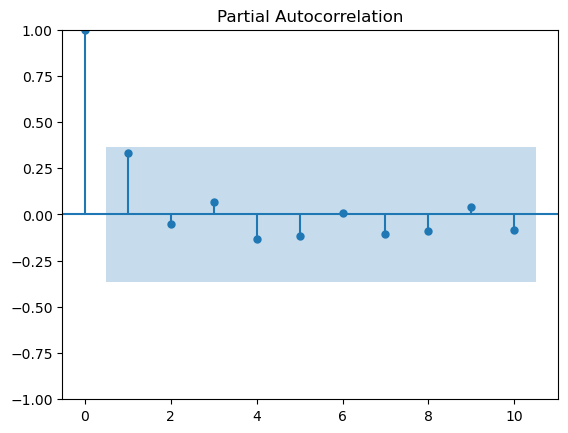

In [24]:
plot_pacf(arima_df['QUANTITY_SOLD'].dropna(),lags=10)
plt.show()

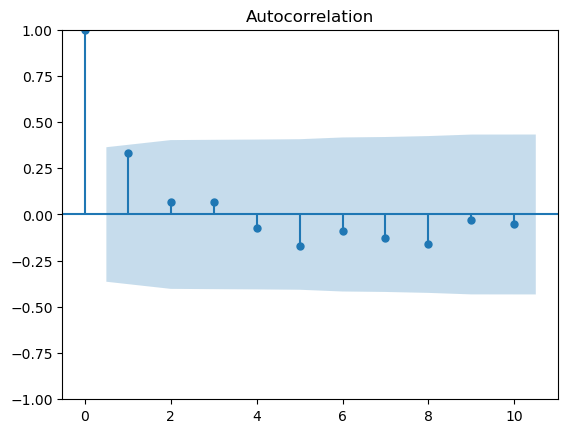

In [25]:
plot_acf(arima_df['QUANTITY_SOLD'].dropna(),lags=10)
plt.show()

## Plotting Decompisiton Chart

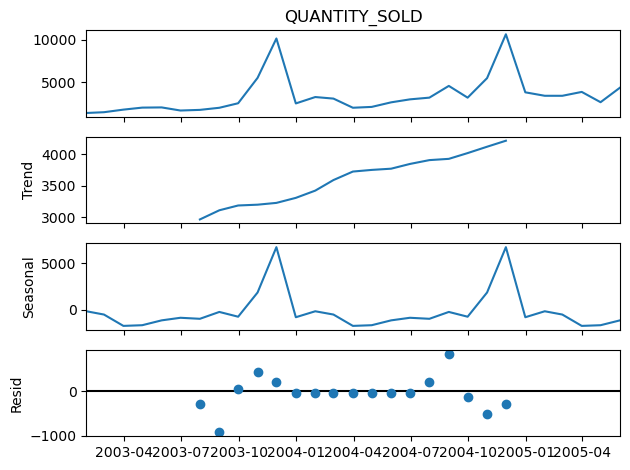

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(arima_df['QUANTITY_SOLD'], model='additive', period=12)
decomposition.plot()
plt.show()

- The decomposition chart shows clear trend and seasonality pattern which is why I proceed ahead directly with SARIMA model inorporating seasonality.

## Running auto ARIMA for determining ideal p,q,d,s values

In [142]:
import pmdarima as pm

smodel = pm.auto_arima(arima_df['QUANTITY_SOLD'], start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=262.752, Time=0.24 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=266.214, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=265.391, Time=0.04 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=261.020, Time=0.10 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=259.359, Time=0.03 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=261.038, Time=0.11 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=261.067, Time=0.05 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=261.119, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=263.656, Time=0.02 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=262.449, Time=0.08 sec
 ARIMA(0,2,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,1,0)[12]          
Total fit time: 1.161 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   29
Model:             SARIMAX(0, 2, 1)x(0, 1, [], 12)   Log Likelihood                -127.679
Date:                             Thu, 29 Aug 2024   AIC                            259.359
Time:                                     23:15:40   BIC                            260.775
Sample:                                 01-31-2003   HQIC                           259.343
                                      - 05-31-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8702      0.231     -3.772      0.000      -1.322      -0.418
sigma2      1.417e+06    1.1e+06      1.291      0.197   -7.34e+05    3.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.32   Prob(JB):                         0.40
Heteroskedasticity (H):               1.50   Skew:                            -0.78
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitting the model

- I tried the components predicted by auto arima but they gave me very poor results thus after experiencing with several combinations, I came up with component values as below

## Prediction

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
model = SARIMAX(arima_df['QUANTITY_SOLD'],order=(6,1,2),seasonal_order=(6,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=arima_df.index[0], end=arima_df.index[-1])

C:\Users\user_name\anaconda3\Newfolder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [139]:
def calculate_mape(actual, predicted):
    # Avoid division by zero by filtering out zero values
    nonzero_mask = actual != 0
    mape = np.mean(np.abs((actual[nonzero_mask] - predicted[nonzero_mask]) / actual[nonzero_mask])) * 100
    return mape

# Calculate MAPE
mape = calculate_mape(arima_df['QUANTITY_SOLD'], prediction)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 29.53%


- I have trained the data on the entire data set and the MAPE is pretty high but still workable for an MVP product. Further optimizations can certainly improve the prediction accuracy.

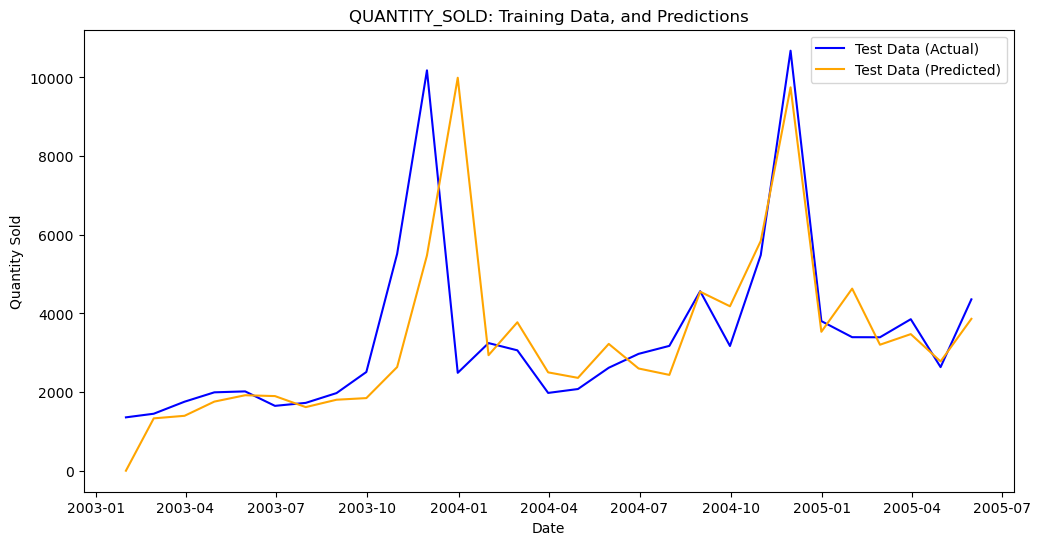

In [143]:
# Plot the training data
plt.figure(figsize=(12, 6))

# Plot the actual values from the test set
plt.plot(arima_df.index, arima_df['QUANTITY_SOLD'], label='Test Data (Actual)', color='blue')

# Plot the predicted values from the SARIMA model
plt.plot(arima_df.index, prediction, label='Test Data (Predicted)', color='orange')

# Adding titles and labels
plt.title('QUANTITY_SOLD: Training Data, and Predictions')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()

# Display the plot
plt.show()

## Forecast

In [127]:
from sklearn.linear_model import LinearRegression

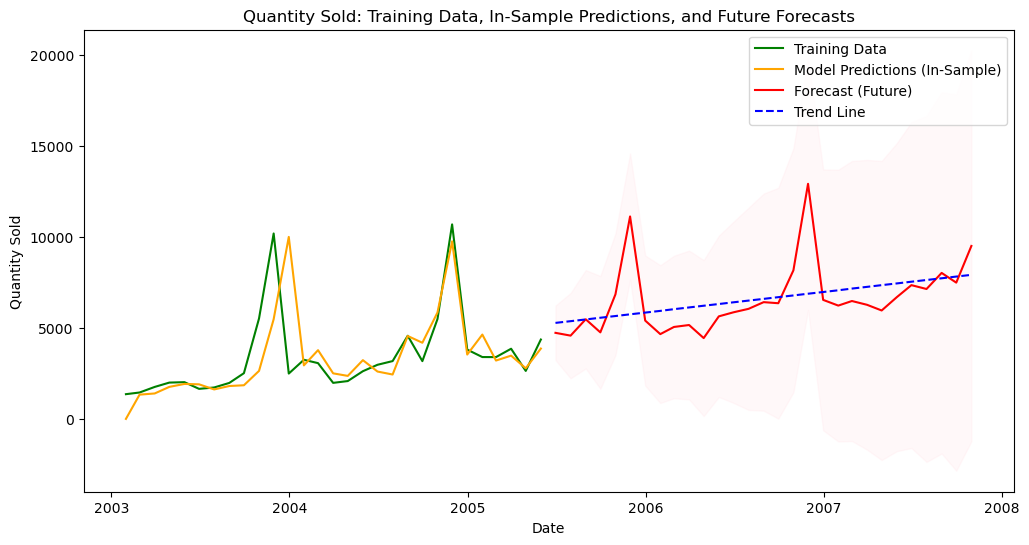

In [129]:
forecast_steps = 29
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=arima_df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'forecast': forecast.predicted_mean,
    'conf_int_lower': forecast.conf_int().iloc[:, 0],
    'conf_int_upper': forecast.conf_int().iloc[:, 1]
}, index=forecast_index)

# Generate in-sample predictions for comparison
prediction = model_fit.predict(start=arima_df.index[0], end=arima_df.index[-1])


forecast_numeric = np.arange(len(forecast_df))
linear_model = LinearRegression()
linear_model.fit(forecast_numeric.reshape(-1, 1), forecast_df['forecast'])
trend_line = linear_model.predict(forecast_numeric.reshape(-1, 1))
# Plotting all data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(arima_df.index, arima_df['QUANTITY_SOLD'], label='Training Data', color='green')

# Plot predicted values
plt.plot(arima_df.index, prediction, label='Model Predictions (In-Sample)', color='orange')

# Plot forecasted values
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast (Future)', color='red')
plt.fill_between(forecast_df.index, forecast_df['conf_int_lower'], forecast_df['conf_int_upper'], color='pink', alpha=0.1)

plt.plot(forecast_df.index, trend_line, label='Trend Line', color='blue', linestyle='--')

# Adding titles and labels
plt.title('Quantity Sold: Training Data, In-Sample Predictions, and Future Forecasts')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()

# Display the plot
plt.show()

In [115]:
print(forecast_df)

                forecast  conf_int_lower  conf_int_upper
2005-06-30   4656.153038     3264.424023     6047.882053
2005-07-31   4502.980568     3000.897530     6005.063605
2005-08-31   5276.843376     3707.265137     6846.421616
2005-09-30   4680.108026     3039.429652     6320.786400
2005-10-31   6527.767684     4869.179454     8186.355914
2005-11-30  10342.630508     8684.340450    12000.920566
2005-12-31   4982.974409     3313.118670     6652.830148
2006-01-31   4705.153794     3015.182477     6395.125110
2006-02-28   4754.300409     3027.749353     6480.851466
2006-03-31   5315.615107     3529.813100     7101.417114
2006-04-30   4616.967521     2765.788845     6468.146196
2006-05-31   5589.979648     3700.823968     7479.135329


In [116]:
arima_df['QUANTITY_SOLD']

ORDERDATE
2003-01-31     1357
2003-02-28     1449
2003-03-31     1755
2003-04-30     1993
2003-05-31     2017
2003-06-30     1649
2003-07-31     1725
2003-08-31     1974
2003-09-30     2510
2003-10-31     5515
2003-11-30    10179
2003-12-31     2489
2004-01-31     3245
2004-02-29     3061
2004-03-31     1978
2004-04-30     2077
2004-05-31     2618
2004-06-30     2971
2004-07-31     3174
2004-08-31     4564
2004-09-30     3171
2004-10-31     5483
2004-11-30    10678
2004-12-31     3804
2005-01-31     3395
2005-02-28     3393
2005-03-31     3852
2005-04-30     2634
2005-05-31     4357
Freq: M, Name: QUANTITY_SOLD, dtype: int64

In [136]:
# Calculate MAPE
mape = calculate_mape(arima_df['QUANTITY_SOLD'], in_sample_predictions)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 29.53%


- As noticed above the model is giving only about 71% accuracy and can be improved further. But now, I will go ahead with the Prophet library to compare the accuracies and build my MVP model.
- Also as noticed, I fitted the SARIMA model to my entire data-set but one can experiment by splitting the data into train and test sets as well.